In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data_df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
data_df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


### Understanding the data

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [10]:
data_df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [6]:
data_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

<AxesSubplot:>

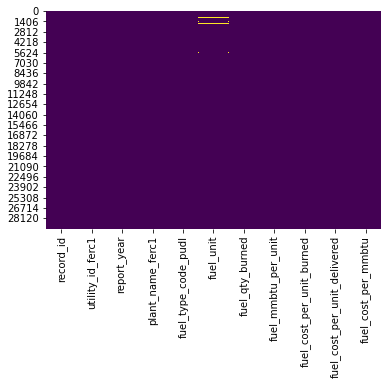

In [7]:
sns.heatmap(data_df.isnull(), cbar=False, cmap='viridis')

In [8]:
data_df.drop(['record_id'], axis = 1, inplace = True)
data_df

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...
29518,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [9]:
data_df.drop(['fuel_unit'], axis = 1, inplace = True)
data_df

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,rockport total plant,coal,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,gorgas,coal,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,barry,coal,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,chickasaw,gas,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...
29518,12,2018,neil simpson ct #1,gas,18799.0,1.059,4.78,4.78,9.030
29519,12,2018,cheyenne prairie 58%,gas,806730.0,1.050,3.65,3.65,6.950
29520,12,2018,lange ct facility,gas,104554.0,1.060,4.77,4.77,8.990
29521,12,2018,wygen 3 bhp 52%,coal,315945.0,16.108,3.06,14.76,1.110


<AxesSubplot:>

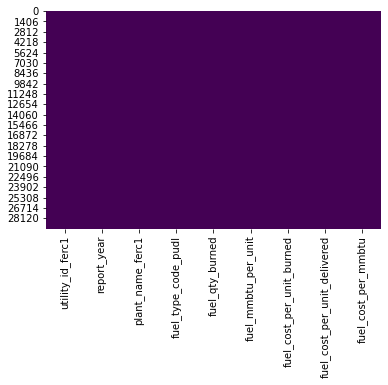

In [11]:
sns.heatmap(data_df.isnull(), cbar=False, cmap='viridis')

In [12]:
data_df.value_counts('fuel_type_code_pudl')

fuel_type_code_pudl
gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
dtype: int64

In [13]:
data1 = data_df['fuel_qty_burned']

In [14]:
data1.skew()

15.851495469109503

In [15]:
data1.kurtosis()

651.3694501337732

### Performing Exploratory Data Analysis

<AxesSubplot:>

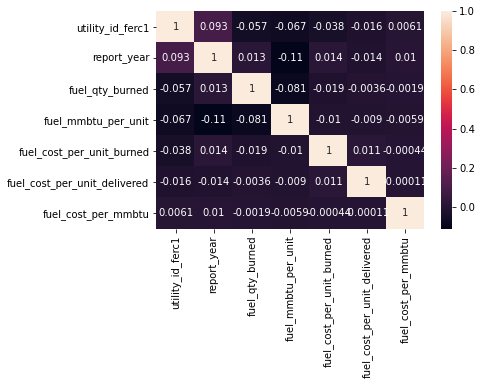

In [16]:
sns.heatmap(data_df.corr(), annot = True)

In [17]:
data_df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


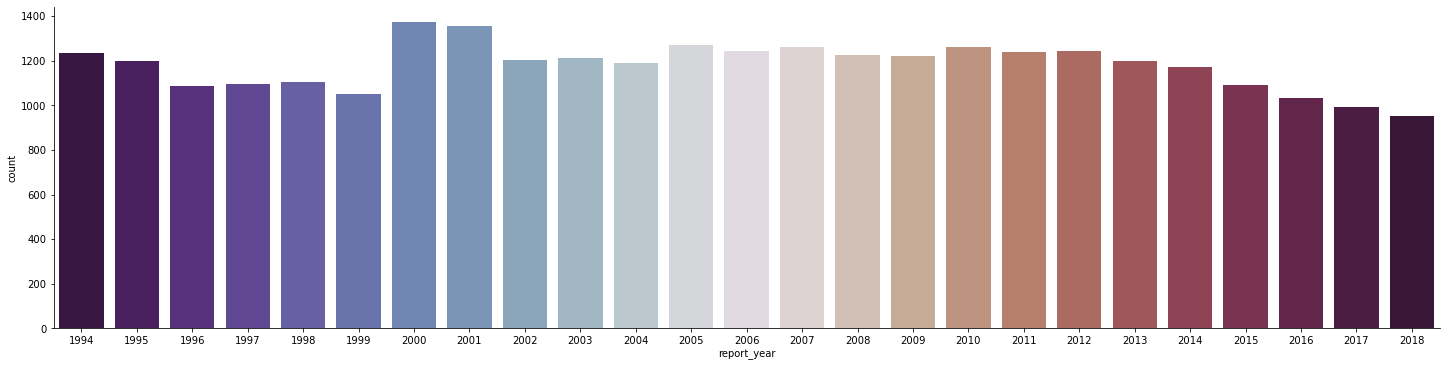

In [18]:
 sns.catplot(x='report_year', kind ='count', aspect = 4, color = True, palette = 'twilight_shifted', data= data_df)
#To determine which year had the highest report

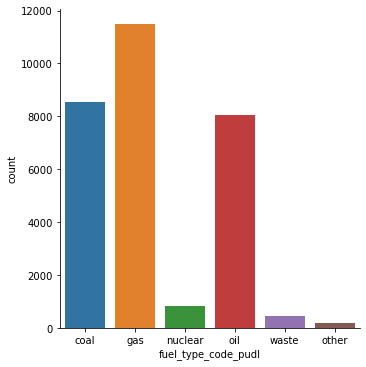

In [19]:
fig3=sns.catplot(x='fuel_type_code_pudl',kind='count', data=data_df)
fig3

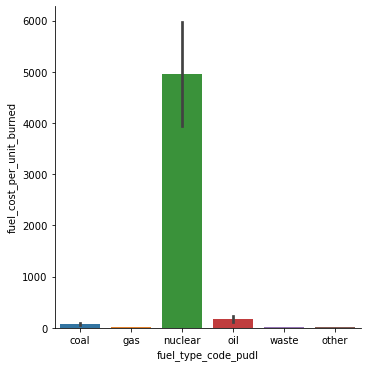

In [20]:
sns.catplot(x='fuel_type_code_pudl',y='fuel_cost_per_unit_burned',data=data_df,kind='bar')

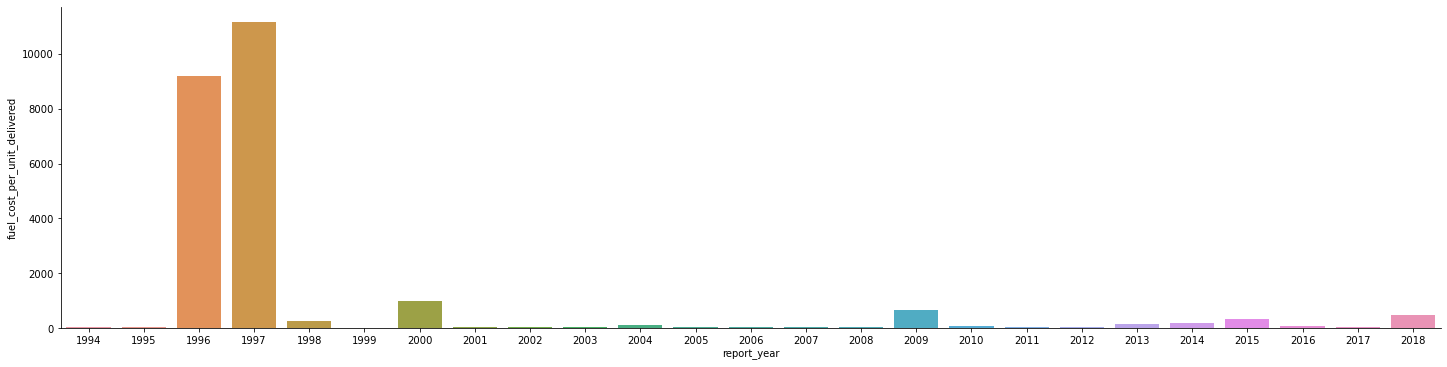

In [21]:
sns.catplot(x='report_year',y='fuel_cost_per_unit_delivered', aspect = 4, data=data_df,kind='bar', ci= None)

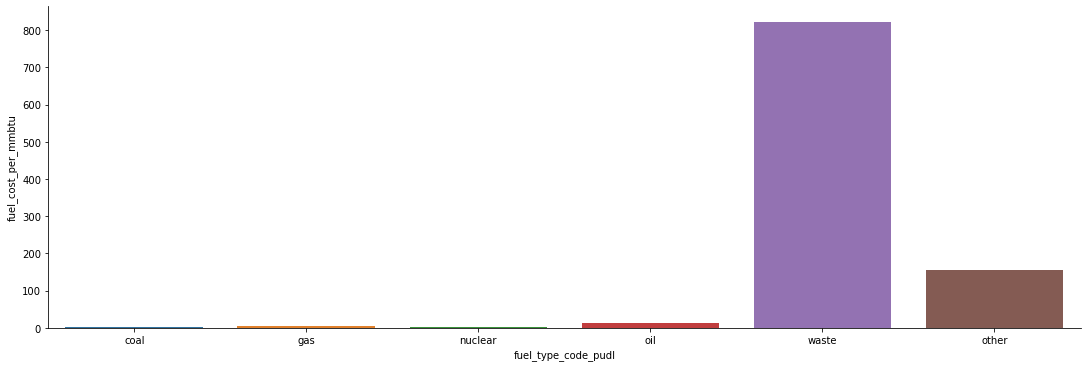

In [22]:
sns.catplot(x='fuel_type_code_pudl',y='fuel_cost_per_mmbtu', aspect = 3, data=data_df,kind='bar', ci= None)

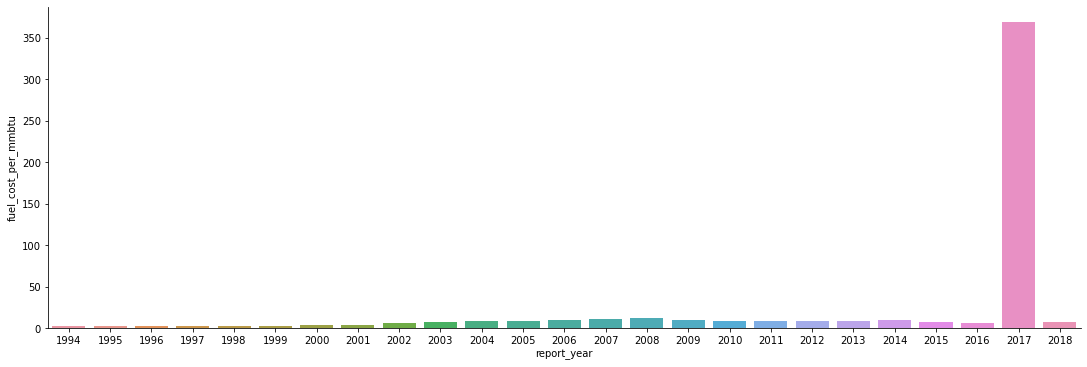

In [23]:
sns.catplot(x='report_year',y='fuel_cost_per_mmbtu', aspect = 3, data=data_df,kind='bar', ci= None)